# Choosing color palettes
Color is more important than other aspects of figure style because color can reveal patterns in the data if used effectively or hide those patterns if used poorly. There are a number of great resources to learn about good techniques for using color in visualizations, I am partial to this [series of blog posts](http://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/) from Rob Simmon and this [more technical paper](https://cfwebprod.sandia.gov/cfdocs/CompResearch/docs/ColorMapsExpanded.pdf). The matplotlib docs also now have a [nice tutorial](http://matplotlib.org/users/colormaps.html) that illustrates some of the perceptual properties of the built in colormaps.

Seaborn makes it easy to select and use color palettes that are suited to the kind of data you are working with and the goals you have in visualizing it.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))

# Building color palettes
The most important function for working with discrete color palettes is color_palette(). This function provides an interface to many (though not all) of the possible ways you can generate colors in seaborn, and it’s used internally by any function that has a palette argument (and in some cases for a color argument when multiple colors are needed).

color_palette() will accept the name of any seaborn palette or matplotlib colormap (except jet, which you should never use). It can also take a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names). The return value is always a list of RGB tuples.

Finally, calling color_palette() with no arguments will return the current default color cycle.

A corresponding function, set_palette(), takes the same arguments and will set the default color cycle for all plots. You can also use color_palette() in a with statement to temporarily change the default palette (see below).

It is generally not possible to know what kind of color palette or colormap is best for a set of data without knowing about the characteristics of the data. Following that, we’ll break up the different ways to use color_palette() and other seaborn palette functions by the three general kinds of color palettes: qualitative, sequential, and diverging.

## Qualitative color palettes
Qualitative (or categorical) palettes are best when you want to distinguish discrete chunks of data that do not have an inherent ordering.

When importing seaborn, the default color cycle is changed to a set of six colors that evoke the standard matplotlib color cycle while aiming to be a bit more pleasing to look at.

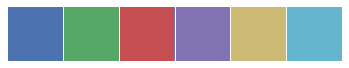

In [4]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

There are six variations of the default theme, called deep, muted, pastel, bright, dark, and colorblind.

## Using circular color systems
When you have more than six categories to distinguish, the easiest thing is to draw evenly-spaced colors in a circular color space (such that the hue changes which keeping the brightness and saturation constant). This is what most seaborn functions default to when they need to use more colors than are currently set in the default color cycle.

The most common way to do this uses the hls color space, which is a simple transformation of RGB values.

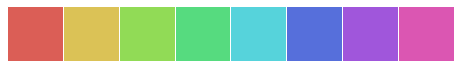

In [5]:
sns.palplot(sns.color_palette("hls", 8))

There is also the [hls_palette()](https://seaborn.pydata.org/generated/seaborn.hls_palette.html#seaborn.hls_palette) function that lets you control the lightness and saturation of the colors.

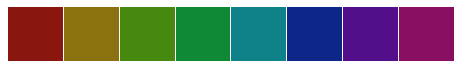

In [6]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8))

However, because of the way the human visual system works, colors that are even “intensity” in terms of their RGB levels won’t necessarily look equally intense. We perceive yellows and greens as relatively brighter and blues as relatively darker, which can be a problem when aiming for uniformity with the hls system.

To remedy this, seaborn provides an interface to the [husl](http://www.boronine.com/husl/) system, which also makes it easy to select evenly spaced hues while keeping the apparent brightness and saturation much more uniform.

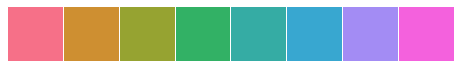

In [7]:
sns.palplot(sns.color_palette("husl", 8))

There is similarly a function called [husl_palette()](https://seaborn.pydata.org/generated/seaborn.husl_palette.html#seaborn.husl_palette) that provides a more flexible interface to this system.

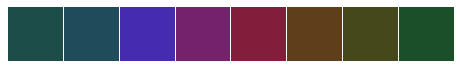

In [10]:
sns.palplot(sns.husl_palette(8, h=.5, l=.3, s=.8))

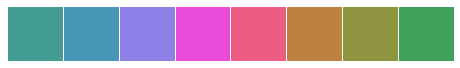

In [11]:
sns.palplot(sns.husl_palette(8, h=.5, l=.6, s=.8))

## Using categorical Color Brewer palettes
Another source of visually pleasing categorical palettes comes from the [Color Brewer](http://colorbrewer2.org/) tool (which also has sequential and diverging palettes, as we’ll see below). These also exist as matplotlib colormaps, but they are not handled properly. In seaborn, when you ask for a qualitative Color Brewer palette, you’ll always get the discrete colors, but this means that at a certain point they will begin to cycle.

A nice feature of the Color Brewer website is that it provides some guidance on which palettes are color blind safe. There are a variety of [kinds](http://en.wikipedia.org/wiki/Color_blindness) of color blindness, but the most common variant leads to difficulty distinguishing reds and greens. It’s generally a good idea to avoid using red and green for plot elements that need to be discriminated based on color.

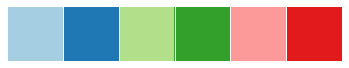

In [13]:
sns.palplot(sns.color_palette("Paired"))

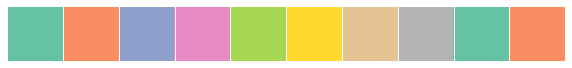

In [14]:
sns.palplot(sns.color_palette("Set2", 10))

To help you choose palettes from the Color Brewer library, there is the [choose_colorbrewer_palette()](https://seaborn.pydata.org/generated/seaborn.choose_colorbrewer_palette.html#seaborn.choose_colorbrewer_palette) function. This function, which must be used in an IPython notebook, will launch an interactive widget that lets you browse the various options and tweak their parameters.

Of course, you might just want to use a set of colors you particularly like together. Because [color_palette()](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) accepts a list of colors, this is easy to do.

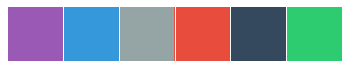

In [15]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

## Using named colors from the xkcd color survey
A while back, xkcd ran a crowdsourced effort to name random RGB colors. This produced a set of 954 named colors, which you can now reference in seaborn using the xkcd_rgb dictionary:

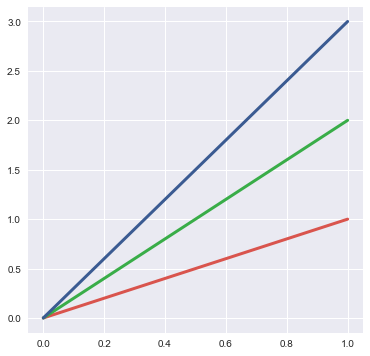

In [16]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3)

In addition to pulling out single colors from the xkcd_rgb dictionary, you can also pass a list of names to the [xkcd_palette()](https://seaborn.pydata.org/generated/seaborn.xkcd_palette.html#seaborn.xkcd_palette) function.

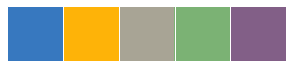

In [17]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))